In [6]:
import os
import random

import numpy as np

from rfft.hypothesis import Hypothesis
from rfft.multilayer_perceptron import MultilayerPerceptron

from decoy_mnist import generate_dataset
from decoy_mnist import load_annotations
from decoy_mnist import load_hypothesis

In [7]:
Xr, X, y, E, Xtr, Xt, yt, Et = generate_dataset()

In [8]:
dirname = 'tagging/decoy_mnist'

In [9]:
def score_model(mlp):
    print('Train: {0}, Test: {1}'.format(mlp.score(X, y), mlp.score(Xt, yt)))
    return (mlp.score(X, y), mlp.score(Xt, yt))

In [22]:
def run_experiment():
    indices, hypothesis = load_annotations(X.shape)
    
    accuracies = []

    for i, weight_per_mask in enumerate(np.logspace(start=1, stop=3, num=7)):
        hypothesis.weight = weight_per_mask * len(indices)
        print('Weight = {0}'.format(hypothesis.weight))
        mlp = MultilayerPerceptron()
        mlp.fit(X,
                y,
                hypothesis=hypothesis,
                num_epochs=16,
                always_include=indices,
                show_progress_every=500,
                verbose=True)

        train_acc, test_acc = score_model(mlp)
        accuracies.append((weight_per_mask, train_acc, test_acc))
    return accuracies

In [23]:
accuracies = run_experiment()

400.0
Iteration=3500, crossentropy=170.213031732, rightreasons=31.5338351368, smallparams=0.0409094387314, lenX=1.0Train: 0.8682, Test: 0.6742
861.7738760127532
Iteration=3500, crossentropy=193.58989717, rightreasons=23.8509791238, smallparams=0.0397453088067, lenX=1.00Train: 0.880233333333, Test: 0.7406
1856.635533445111
Iteration=3500, crossentropy=311.744022875, rightreasons=17.5719981711, smallparams=0.0424045933965, lenX=1.0Train: 0.731883333333, Test: 0.7047
4000.0
Iteration=3500, crossentropy=510.068708158, rightreasons=69.7723726598, smallparams=0.041140131126, lenX=1.00Train: 0.615, Test: 0.5495
8617.73876012753
Iteration=3500, crossentropy=474.50990087, rightreasons=102.598990484, smallparams=0.0430360474867, lenX=1.00Train: 0.5916, Test: 0.5154
18566.35533445111
Iteration=3500, crossentropy=1062.82593913, rightreasons=388.983649574, smallparams=0.0443181428151, lenX=1.0Train: 0.461783333333, Test: 0.4301
40000.0
Iteration=3500, crossentropy=967.043446066, rightreasons=1227.3

In [94]:
weights = np.logspace(start=1, stop=3, num=7)
accuracies = [
    (0.8682, 0.6742),
    (0.880233333333, 0.7406),
    (0.731883333333, 0.7047),
    (0.615, 0.5495),
    (0.5916, 0.5154),
    (0.461783333333, 0.4301),
    (0.383683333333, 0.3485)
]

for i in range(len(accuracies)):
    accuracies[i] = (weights[i], accuracies[i][0], accuracies[i][1])

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import spline

In [96]:
print(accuracies[:, 2])

TypeError: list indices must be integers, not tuple

In [109]:
accuracies = np.array(list(map(list, accuracies)))
xnew = np.linspace(accuracies[:, 0].min(), accuracies[:, 0].max(), 7)
power_smooth = spline(np.array(accuracies[:, 0]), accuracies[:, 2], np.array(xnew))

/home/atithi/lime/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  This is separate from the ipykernel package so we can avoid doing imports until


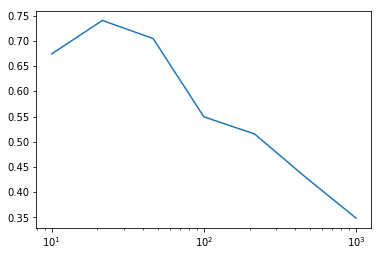

In [112]:
ax = plt.plot(accuracies[:, 0], accuracies[:, 2])
plt.title('Hypothesis Weight vs Accuracy')
p
plt.xscale('log')
plt.show()